In [65]:
# Import useful libraries
import operator
import scipy as sp
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from math import isnan
from sklearn import preprocessing
from collections import Counter
from collections import OrderedDict 
%matplotlib inline 
plt.style.use('seaborn-whitegrid')
colors = cm.Set3(np.linspace(0, 1, len(labels)))
goldstein_scaler = preprocessing.MinMaxScaler(feature_range=(-10, 10), copy=True)

# Declare global variables
all_events = pd.read_csv('all_events.csv').sort_values('SQLDATE', ascending=1)
goldstein_codes = pd.read_csv('goldstein_codes.csv')
event_codes = pd.read_csv('event_codes.csv')
events, goldstein = {}, {}

# Populate event names dictionary
for index, row in event_codes.iterrows():
    events[row.CAMEOEVENTCODE] = row.EVENTDESCRIPTION
events[106] = 'unknown'

# Populate goldstein scale dictionary
for index, row in goldstein_codes.iterrows():
    goldstein[int(row.CAMEOEVENTCODE)] = row.GOLDSTEINSCALE
goldstein[106] = 0

## SQL Query

SELECT * FROM [gdelt-bq:gdeltv2.events] 

WHERE Actor1Geo_CountryCode = 'CO' AND Actor2Geo_CountryCode = 'CO'

AND Actor1CountryCode = 'COL' AND Actor2CountryCode = 'COL'

AND SQLDATE >= 20160911 AND SQLDATE <= 20170630

In [59]:
print('Total Events: %s'  %len(all_events))
print('Total Sources: %s'  %sum(all_events.NumSources))
print('Total Articles: %s'  %sum(all_events.NumArticles))
print('Total Mentions: %s'  %sum(all_events.NumMentions))
print('Tone: (Max, {}), (Min, {}), (Avg, {})'.format(max(all_events.AvgTone), min(all_events.AvgTone), np.mean(all_events.AvgTone)))
print('Goldstein Scale: (Max, {}), (Min, {}), (Avg, {})'.format(max(all_events.GoldsteinScale), min(all_events.GoldsteinScale), np.mean(all_events.GoldsteinScale)))

Total Events: 30530
Total Sources: 35524
Total Articles: 202005
Total Mentions: 213161
Tone: (Max, 23.3333333333333), (Min, -17.8217821782178), (Avg, -0.7178063840983893)
Goldstein Scale: (Max, 10.0), (Min, -10.0), (Avg, 2.114179495578328)


# Actor Analysis

## Actor Codes Distributions

<b>Actor1Type1Code, Actor2Type1Code:</b> <em>(character or factor)</em> The 3-character CAMEO code of the CAMEO “type” or
“role” of Actor1 or Actor2, if specified. This can be a specific role such as Police Forces, Government,
Military, Political Opposition, Rebels, etc, a broad role class such as Education, Elites, Media,
Refugees, or organizational classes like Non-Governmental Movement. Special codes such as
Moderate and Radical may refer to the operational strategy of a group.

OrderedDict([('REB', 14729), ('GOV', 12584), ('MIL', 2540), ('CVL', 1072), ('LEG', 924), ('JUD', 664), ('COP', 644), ('MED', 554), ('BUS', 540), ('ELI', 469), ('CRM', 263), ('EDU', 250), ('OPP', 151), ('HLH', 129), ('LAB', 90), ('UAF', 87), ('SPY', 32), ('AGR', 31), ('REF', 22), ('MNC', 15), ('ENV', 7), ('HRI', 6), ('IGO', 4), ('SET', 3), ('SEP', 3)])


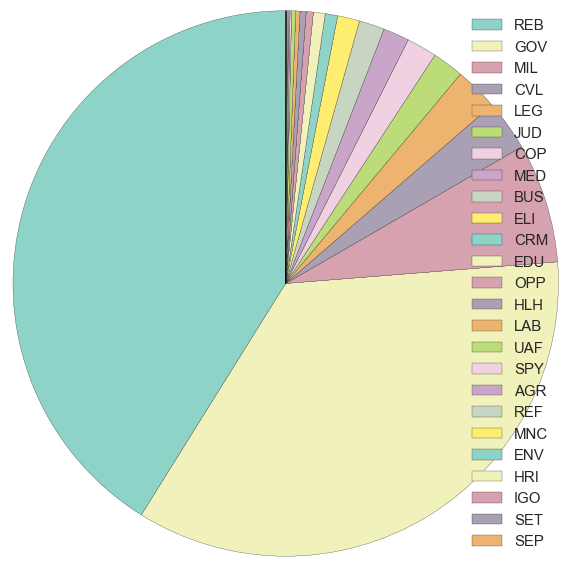

In [60]:
ActorType1Codes = Counter(all_events.Actor1Type1Code) + Counter(all_events.Actor2Type1Code)

# Remove nan key
for value in ActorType1Codes.keys():
    try:
        if isnan(value):
            del ActorType1Codes[value]
            break
    except:
        continue
# Sort values and plot pie chart anti-clockwise
ActorType1Codes = OrderedDict(sorted(ActorType1Codes.items(), key=lambda x: x[1], reverse=True))
print(ActorType1Codes)
labels = list(ActorType1Codes.keys())
sizes = list(ActorType1Codes.values())

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
fig1, ax = plt.subplots(figsize=(8, 8))
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="right", fontsize=15)
plt.axis('equal')
plt.tight_layout()
plt.show()

## Prominent Actors

<b>Actor1Name, Actor2Name:</b> <em>(string)</em> The actual name of the Actor1. In the case of a political leader or
organization, this will be the leader’s formal name (JUAN MANUEL SANTOS, COLOMBIA), for a
geographic match it will be either the country or capital/major city name (COLOMBIA /
BOGOTA), and for ethnic, religious, and type matches it will reflect the root match class (CATHOLIC, POLICE OFFICER, etc). May be blank if the system was unable to identify an Actor1 or Actor2.

OrderedDict([('FARC', 14128), ('JUAN MANUEL SANTOS', 1602), ('ALVARO URIBE VELEZ', 48), ('JUAN CAMILO RESTREPO', 35), ('MARTA LUCIA RAMIREZ', 7), ('JUAN CARLOS ECHEVERRY', 6), ('MARIA ANGELA HOLGUIN CUELLAR', 4), ('REVOLUTIONARY ARMED FORCES OF COLUMBIA', 4), ('FRANCISCO SANTOS', 4), ('GERMAN VARGAS LLERAS', 2)])


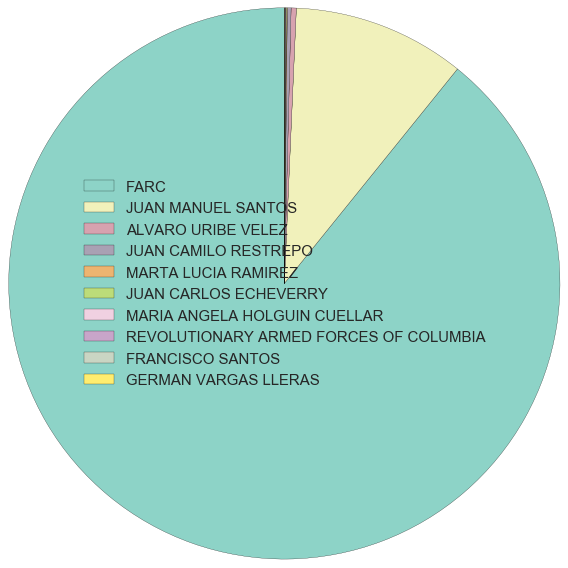

In [61]:
ActorNames = Counter(all_events.Actor1Name) + Counter(all_events.Actor2Name)
LocationNames = ['COLOMBIA', 'COLOMBIAN', 'BOGOTA', 'BARRANQUILLA', 'MEDELLIN', 'BANCOLOMBIA', 'BUCARAMANGA']

# Remove nan key
for value in ActorNames.keys():
    try:
        if isnan(value):
            del ActorNames[value]
            break
    except:
        continue

# Remove Location Names
for location in LocationNames:
    del ActorNames[location]

# Sort values and plot pie chart anti-clockwise
ActorNames = OrderedDict(sorted(ActorNames.items(), key=lambda x: x[1], reverse=True))
print(ActorNames)
labels = list(ActorNames.keys())
sizes = list(ActorNames.values())

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
fig2, ax = plt.subplots(figsize=(8, 8))
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="center", fontsize=15)
plt.axis('equal')
plt.tight_layout()
plt.show()

<b>The Revolutionary Armed Forces of Colombia—People's Army (Spanish: Fuerzas Armadas Revolucionarias de Colombia—Ejército del Pueblo, FARC–EP and FARC)</b> was a guerrilla movement involved in the continuing Colombian armed conflict since 1964. It was known to employ a variety of military tactics in addition to more unconventional methods, including terrorism. The FARC-EP was formed during the Cold War period as a Marxist–Leninist peasant force promoting a political line of agrarianism and anti-imperialism. The operations of the FARC–EP were funded by kidnap and ransom; illegal mining; extortion or taxation of various forms of economic activity; and the taxation, production, and distribution of illegal drugs.

<b>Juan Manuel Santos Calderón</b> <em>(Spanish: [xwan maˈnwel ˈsantos kaldeˈɾon]; born 10 August 1951)</em>, GColIH is the 32nd and current President of Colombia and sole recipient of the 2016 Nobel Peace Prize.

<b>Álvaro Uribe Vélez (Spanish pronunciation:</b> <em>[ˈalβaɾo uˈɾiβe ˈβeles]; born 4 July 1952)</em> is a Colombian politician who served as the 31st President of Colombia from 7 August 2002 to 7 August 2010.

<b>Juan Camilo Restrepo Salazar</b> <em>(born 19 October 1946)</em> was the 10th Minister of Agriculture and Rural Development of Colombia, serving in the administration of President Juan Manuel Santos Calderón. A veteran politician, he also served as the 63rd Minister of Finance and Public Credit of Colombia, the 17th Minister of Mines and Energy of Colombia, the 20th Ambassador of Colombia to France, and as Senator of Colombia. A lifelong member of the Conservative Party, he tried to run for the Conservative presidential nomination in 1998 and 2002, ultimately losing in the primaries both times.

<b>Martha Lucía Ramírez Blanco</b> <em>(born 4 July 1954)</em> is a Colombian lawyer and politician. Elected Senator of Colombia in 2006, Ramírez introduced legislative initiatives to permit women to attain the rank of General in the Military Forces of Colombia, and to mandate English teaching in schools. Ramírez was Colombia’s first female Minister of National Defence, serving from 2002 to 2003 in the administration of President Álvaro Uribe Vélez, and the second woman in Latin America to hold this title. She has also served as the 6th Minister of Foreign Trade of Colombia, from 1998 to 2002.

<b>Juan Carlos Echeverry Garzón</b> <em>(born 12 September 1962)</em> is a Colombian economist and the president of Ecopetrol, an oil and gas company. He served as the 68th Minister of Finance and Public Credit of Colombia. He is the president of Econcept, a financial consulting firm in Bogotá and is an Associate Professor of Economics at University of the Andes. He was also a visiting professor at IE Business School, Madrid in 2013. He served as Colombia’s Minister of Economic Planning from 2000 to 2002 and held the position of Dean of Economics at the University of the Andes from 2002-2006. He was appointed finance minister by Colombia's President-elect Juan Manuel Santos on June 22, 2010.

<b>María Ángela Holguín Cuéllar</b> <em>(born 13 November 1963)</em> is the Minister of Foreign Affairs of Colombia. She has also served as the 25th Permanent Representative of Colombia to the United Nations, and as Ambassador of Colombia to Venezuela.

<b>Francisco Santos Calderón</b> <em>(born October 14, 1961 in Bogotá)</em>, also known as Pacho Santos, is a Colombian politician and journalist. Santos was elected as Álvaro Uribe's second runner up and became Vice President in the Colombian elections of 2002. Santos was re-elected in the presidential elections of 2006 for a second term once again with President Uribe to continue as Vice President of Colombia. His great-uncle Eduardo Santos was President of Colombia from 1938 to 1942 and the current president of Colombia (Juan Manuel Santos) is his cousin.

<b>Germán Vargas Lleras</b> <em>(born February 19, 1962)</em> is a Colombian politician who recently served as the 25th Vice President of Colombia under President Juan Manuel Santos Calderón. A member of the Radical Change political party, he served four consecutive terms in the Senate, having been elected in 1994. German Vargas also served in the Cabinet as the Minister of Interior and then as the Minister of Housing, City and Territory. He was elected Vice President of Colombia in 2014, running alongside Juan Manuel Santos who was seeking re-election for a second term as President. On the 15th of March 2017, Vargas Lleras resigned as Vice President in order to be eligible to run for President in the 2018 Presidential elections.

## Actor Stability

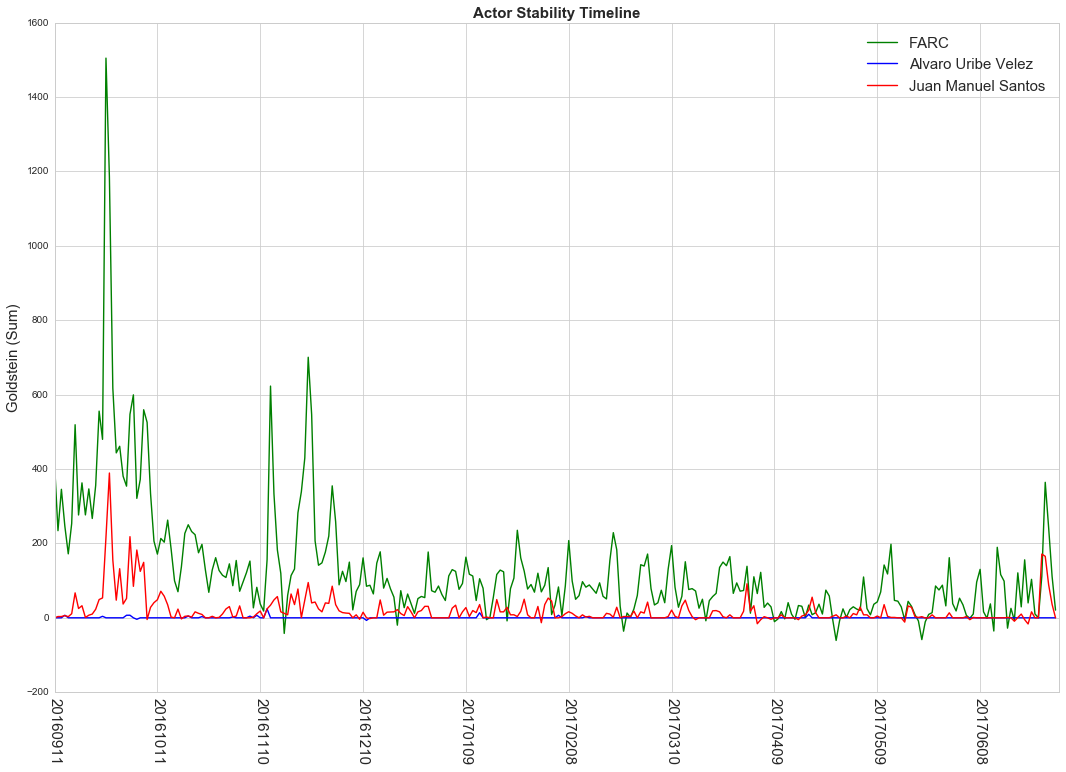

In [70]:
dates = sorted([key for key in Counter(all_events['SQLDATE']).keys()])

# Filter DataFrame by Actor1Name
farc1 = [all_events.loc[all_events['SQLDATE'] == date].loc[all_events['Actor1Name'] == 'FARC', 'GoldsteinScale'].sum() for date in dates] # / (len(all_events.loc[all_events['SQLDATE'] == date].loc[all_events['Actor1Name'] == 'FARC', 'GoldsteinScale'])+1)
santos1 = [all_events.loc[all_events['SQLDATE'] == date].loc[all_events['Actor1Name'] == 'JUAN MANUEL SANTOS', 'GoldsteinScale'].sum() for date in dates] # / (len(all_events.loc[all_events['SQLDATE'] == date].loc[all_events['Actor1Name'] == 'JUAN MANUEL SANTOS', 'GoldsteinScale'])+1)
uribe1 = [all_events.loc[all_events['SQLDATE'] == date].loc[all_events['Actor1Name'] == 'ALVARO URIBE VELEZ', 'GoldsteinScale'].sum() for date in dates] # / (len(all_events.loc[all_events['SQLDATE'] == date].loc[all_events['Actor1Name'] == 'ALVARO URIBE VELEZ', 'GoldsteinScale'])+1) 

# Filter DataFrame by Actor2Name
farc2 = [all_events.loc[all_events['SQLDATE'] == date].loc[all_events['Actor2Name'] == 'FARC', 'GoldsteinScale'].sum() for date in dates] # / (len(all_events.loc[all_events['SQLDATE'] == date].loc[all_events['Actor2Name'] == 'FARC', 'GoldsteinScale'])+1)
santos2 = [all_events.loc[all_events['SQLDATE'] == date].loc[all_events['Actor2Name'] == 'JUAN MANUEL SANTOS', 'GoldsteinScale'].sum() for date in dates] # / (len(all_events.loc[all_events['SQLDATE'] == date].loc[all_events['Actor2Name'] == 'FARC', 'GoldsteinScale'])+1)
uribe2 = [all_events.loc[all_events['SQLDATE'] == date].loc[all_events['Actor2Name'] == 'ALVARO URIBE VELEZ', 'GoldsteinScale'].sum() for date in dates] # / (len(all_events.loc[all_events['SQLDATE'] == date].loc[all_events['Actor2Name'] == 'ALVARO URIBE VELEZ', 'GoldsteinScale'])+1) 

# Sum Actor1Name and Actor2Name
for i in range(len(farc2)):
    farc1[i] += farc2[i]
for i in range(len(santos2)):
    santos1[i] += santos2[i]  
for i in range(len(uribe2)):
    uribe1[i] += uribe2[i]
    
    
farc = np.array(farc1)
uribe = np.array(uribe1)
santos = np.array(santos1)

# Create x-axis index
ind = np.arange(len(dates)) 

# Create Actor Stability plot
fig3, ax = plt.subplots(figsize=(18, 12))
ax.set_title('Actor Stability Timeline', fontsize=15, fontweight='bold')
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('', fontsize=15)
ax.set_ylabel('Goldstein (Sum)' , fontsize=15)
ax.set_xticks(np.arange(0, len(dates), 30))
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=270)
ax.set_xticklabels(dates[::30])
#ax.set_yscale("log") 
plt.plot(ind, farc1, label='FARC', c='g')
plt.plot(ind, uribe1, label='Alvaro Uribe Velez', c='b')
plt.plot(ind, santos1, label='Juan Manuel Santos', c='r')
plt.xlim([0,len(dates)])
plt.legend(loc='best', fontsize=15)

In [54]:
print('Farc - Santos: ', sp.stats.spearmanr(farc1,santos1))
print('Farc - Uribe: ', sp.stats.spearmanr(farc1,uribe1))
print('Uribe - Santos: ', sp.stats.spearmanr(uribe1,santos1))

Farc - Santos:  SpearmanrResult(correlation=0.49743432889891287, pvalue=1.0119179039638887e-19)
Farc - Uribe:  SpearmanrResult(correlation=0.11906410960754288, pvalue=0.041691411945300801)
Uribe - Santos:  SpearmanrResult(correlation=0.0772293351663806, pvalue=0.18741257697571606)


## Actor Tone

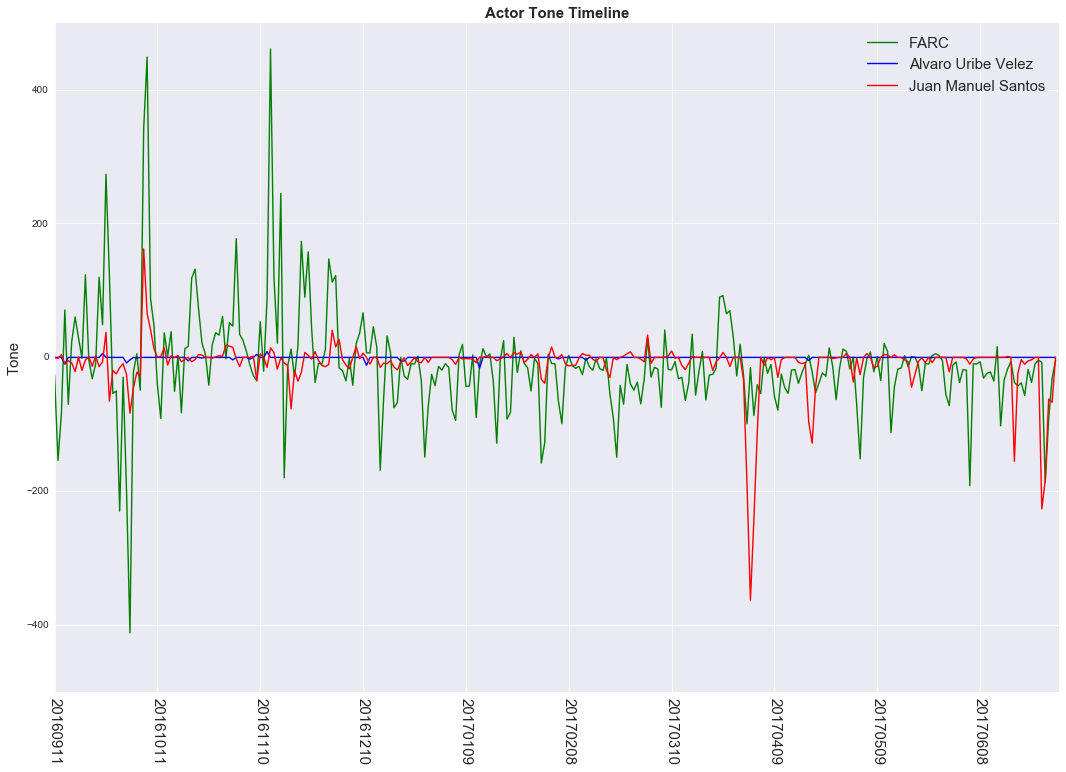

In [31]:
# Filter DataFrame by Actor1Name
farc1 = [all_events.loc[all_events['SQLDATE'] == date].loc[all_events['Actor1Name'] == 'FARC', 'AvgTone'].sum() for date in dates]
santos1 = [all_events.loc[all_events['SQLDATE'] == date].loc[all_events['Actor1Name'] == 'JUAN MANUEL SANTOS', 'AvgTone'].sum() for date in dates]
uribe1 = [all_events.loc[all_events['SQLDATE'] == date].loc[all_events['Actor1Name'] == 'ALVARO URIBE VELEZ', 'AvgTone'].sum() for date in dates]

# Filter DataFrame by Actor2Name
farc2 = [all_events.loc[all_events['SQLDATE'] == date].loc[all_events['Actor2Name'] == 'FARC', 'AvgTone'].sum() for date in dates]
santos2 = [all_events.loc[all_events['SQLDATE'] == date].loc[all_events['Actor2Name'] == 'JUAN MANUEL SANTOS', 'AvgTone'].sum() for date in dates]
uribe2 = [all_events.loc[all_events['SQLDATE'] == date].loc[all_events['Actor2Name'] == 'ALVARO URIBE VELEZ', 'AvgTone'].sum() for date in dates]

# Sum Actor1Name and Actor2Name
for i in range(len(farc2)):
    farc1[i] += farc2[i]
for i in range(len(santos2)):
    santos1[i] += santos2[i]
for i in range(len(uribe2)):
    uribe1[i] += uribe2[i]

# Create x-axis index
ind = np.arange(len(dates)) 

# Create Actor Stability plot
fig4, ax = plt.subplots(figsize=(18, 12))
ax.set_title('Actor Tone Timeline', fontsize=15, fontweight='bold')
plt.style.use('seaborn-paper')
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('', fontsize=15)
ax.set_ylabel('Tone' , fontsize=15)
ax.set_xticks(np.arange(0, len(dates), 30))
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=270)
ax.set_xticklabels(dates[::30])
plt.plot(ind, farc1, label='FARC', c='g')
plt.plot(ind, uribe1, label='Alvaro Uribe Velez', c='b')
plt.plot(ind, santos1, label='Juan Manuel Santos', c='r')
plt.xlim([0,len(dates)])
plt.legend(loc='best', fontsize=15)

In [32]:
print('Farc - Santos: ', sp.stats.spearmanr(farc1,santos1))
print('Farc - Uribe: ', sp.stats.spearmanr(farc1,uribe1))
print('Uribe - Santos: ', sp.stats.spearmanr(uribe1,santos1))

Farc - Santos:  SpearmanrResult(correlation=0.27278438234284358, pvalue=2.1419814892021911e-06)
Farc - Uribe:  SpearmanrResult(correlation=-0.019820552347355209, pvalue=0.73547160123968758)
Uribe - Santos:  SpearmanrResult(correlation=-0.042219656837835649, pvalue=0.47157672111235549)


# Event Analysis

## Prominent Events (>100 Occurrences)

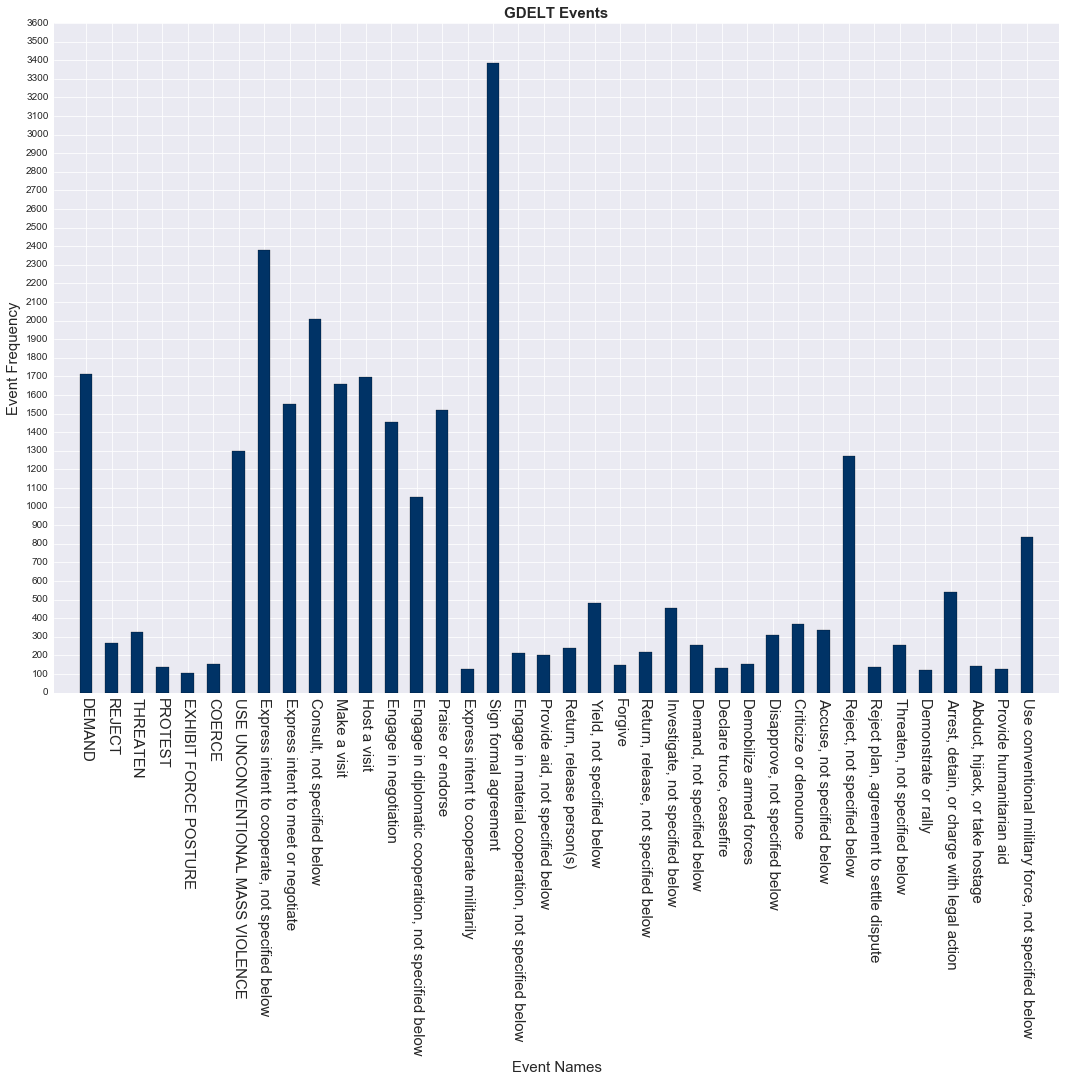

In [33]:
df_events = pd.DataFrame()
df_events['keys'] = Counter(all_events.EventCode).keys()
df_events['values'] =  Counter(all_events.EventCode).values()

df_events = df_events.loc[df_events['values'] > 100]

labels = [events[x] for x in list(df_events['keys'])]
values = list(df_events['values'])

ind = np.arange(len(df_events)) 

width = 0.5

fig5, ax = plt.subplots(figsize=(18, 12))
plt.style.use('seaborn-paper')
ax.set_title('GDELT Events', fontsize=15, fontweight='bold')
ax.set_xlabel('Event Names', fontsize=15)
ax.set_ylabel('Event Frequency' , fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
plt.bar(ind, values, width, color='#003366')
ax.set_yticks(np.arange(0, 3700, 100))
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=270)
plt.xticks(ind + width*0.5)
ax.set_xticklabels(labels)
plt.xlim([-1,38.5])
plt.show()

# Activity, Tone & Stability (ATS)

## Daily Activity Timeline

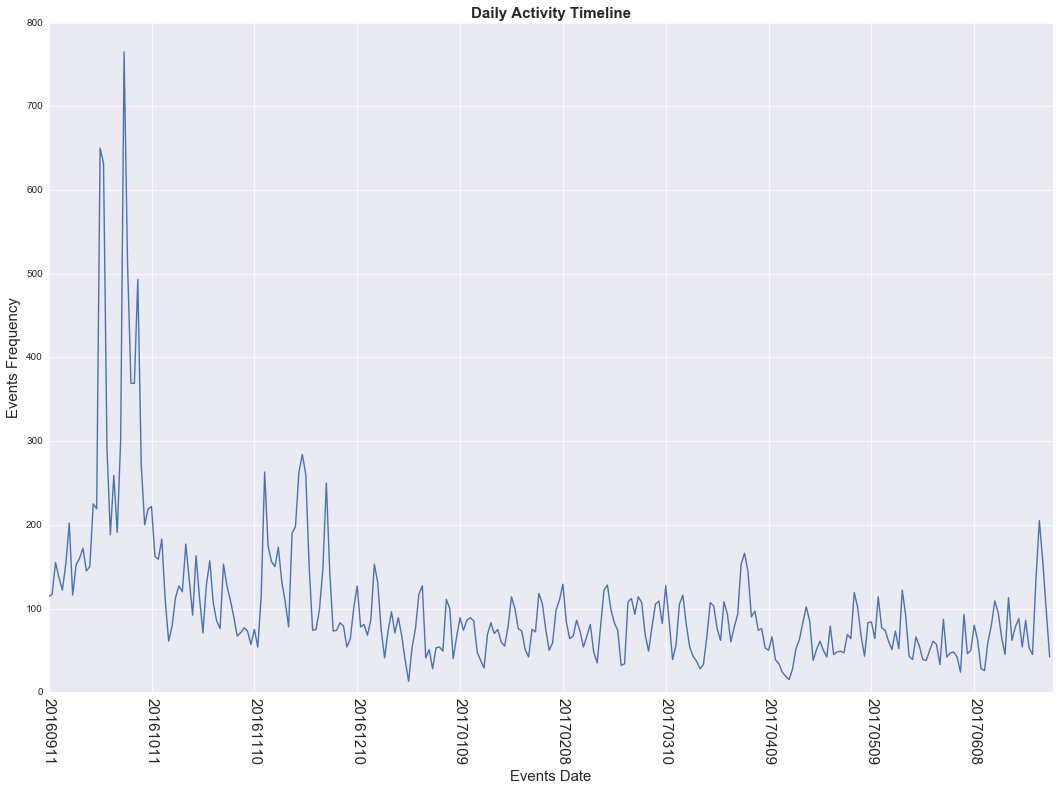

In [34]:
labels = sorted([key for key in Counter(all_events['SQLDATE']).keys()])
ind = np.arange(len(labels)) 

activity = [len(all_events.loc[all_events['SQLDATE'] == key]) for key in labels]

fig6, ax = plt.subplots(figsize=(18, 12))
ax.set_title('Daily Activity Timeline', fontsize=15, fontweight='bold')
plt.style.use('seaborn-paper')
ax.set_xlabel('Events Date', fontsize=15)
ax.set_ylabel('Events Frequency' , fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xticks(np.arange(0, len(labels), 30))
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=270)
plt.xlim([0,len(labels)])
ax.set_xticklabels(labels[::30])
plt.plot(ind, activity, label='')

## Daily Tone Timeline

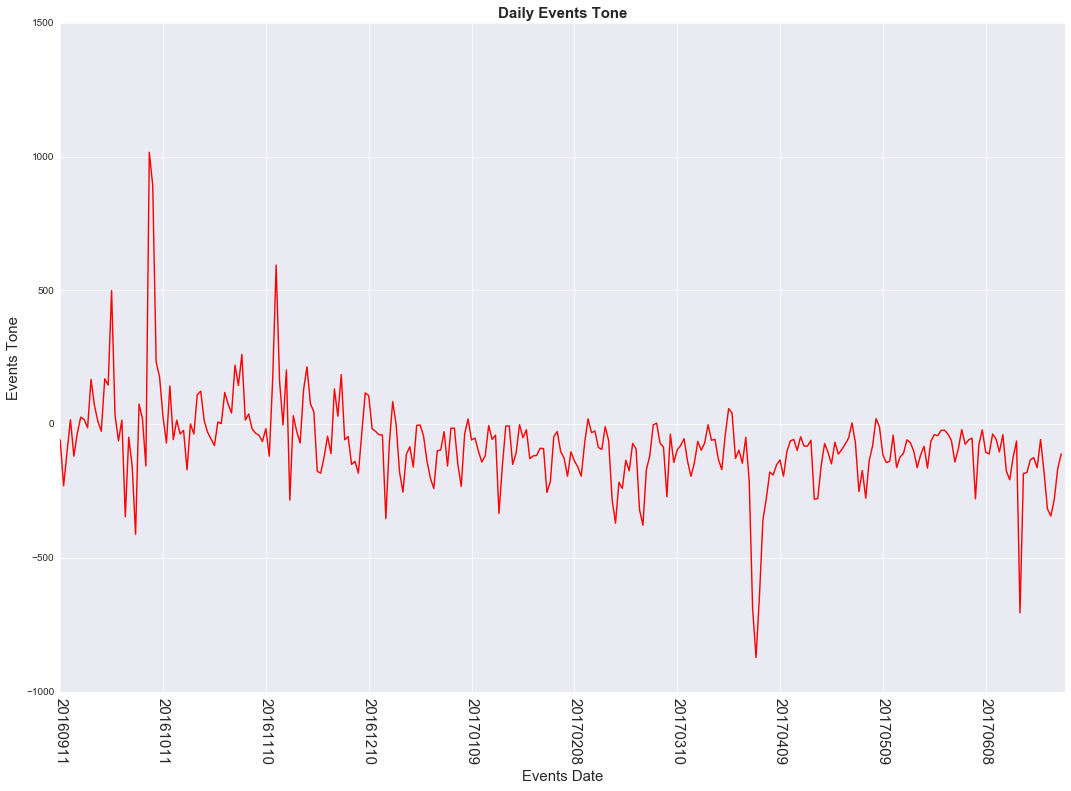

In [35]:
tone = [all_events.loc[all_events['SQLDATE'] == key, 'AvgTone'].sum() for key in labels]

fig7, ax = plt.subplots(figsize=(18, 12))
ax.set_title('Daily Events Tone', fontsize=15, fontweight='bold')
plt.style.use('seaborn-paper')
ax.set_xlabel('Events Date', fontsize=15)
ax.set_ylabel('Events Tone' , fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xticks(np.arange(0, len(labels), 30))
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=270)
plt.xlim([0,len(labels)])
ax.set_xticklabels(labels[::30])
plt.plot(ind, tone, label='', c='r')


## Stability

### Daily Stability Timeline

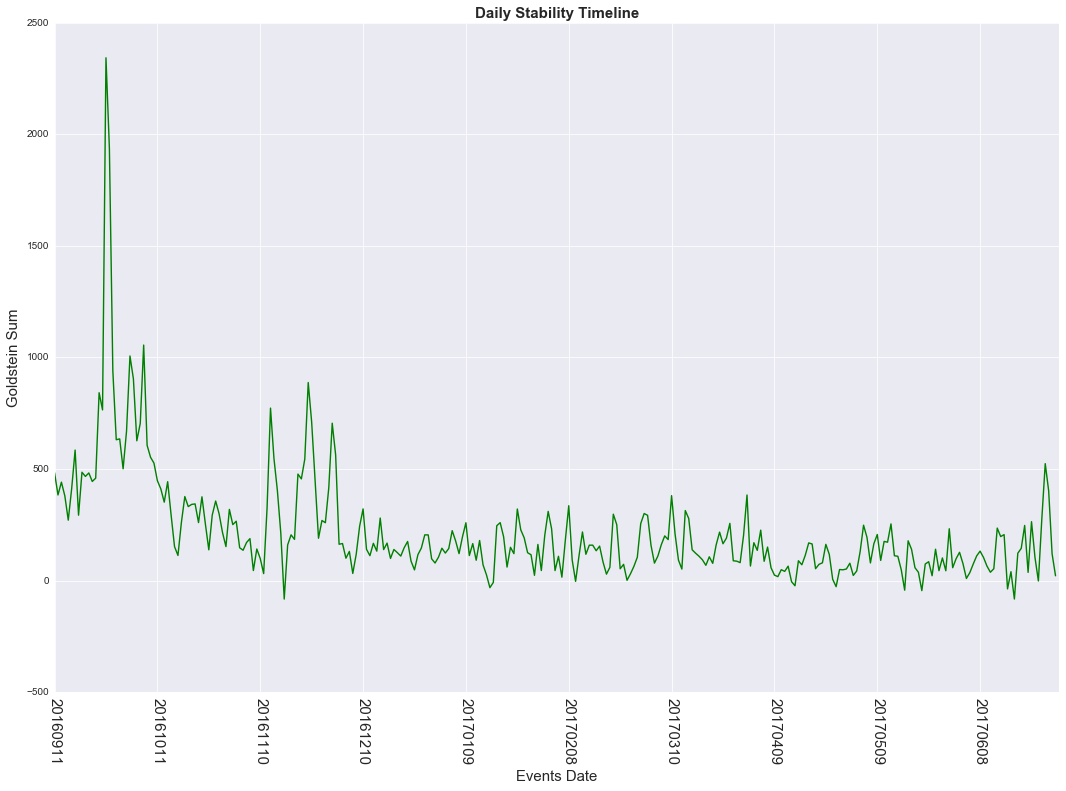

In [36]:
stability = [all_events.loc[all_events['SQLDATE'] == key, 'GoldsteinScale'].sum() for key in labels]

fig8, ax = plt.subplots(figsize=(18, 12))
ax.set_title('Daily Stability Timeline', fontsize=15, fontweight='bold')
plt.style.use('seaborn-paper')
ax.set_xlabel('Events Date', fontsize=15)
ax.set_ylabel('Goldstein Sum' , fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xticks(np.arange(0, len(labels), 30))
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=270)
plt.xlim([0,len(labels)])
ax.set_xticklabels(labels[::30])
plt.plot(ind, stability, label='Stability', c='g')



### Goldstein Scatter Plot

(0.99549179843245994, 10000)

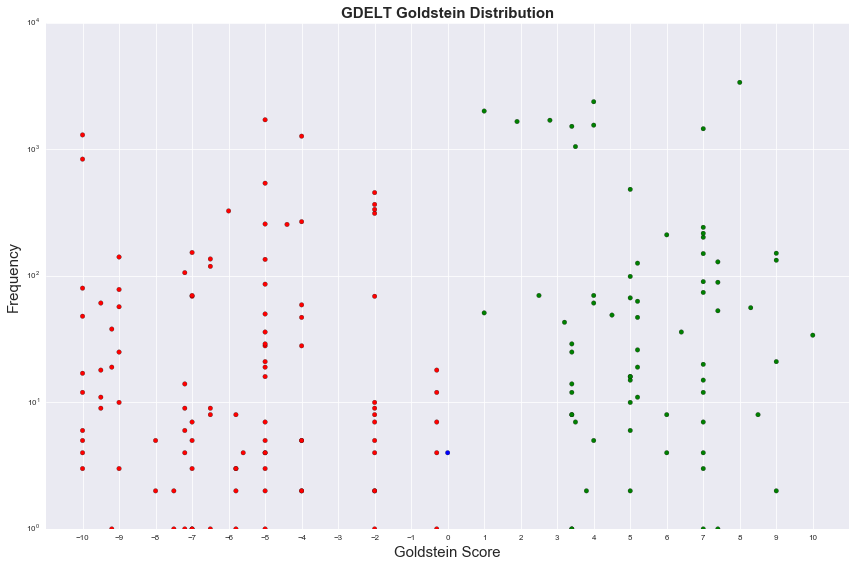

In [37]:
event_code_frequency = Counter(all_events.EventCode)
event_names = [events[key] for key in Counter(all_events.EventCode).keys()]
event_frequency = [event_code_frequency[key] for key in Counter(all_events.EventCode).keys()]
event_goldstein = [goldstein[key]for key in Counter(all_events.EventCode).keys()]
colors = []
    
for value in event_goldstein:
    if value < 0:
        colors.append('r')
    elif value > 0:
        colors.append('g')
    else:
        colors.append('b')
        
fig9, ax = plt.subplots(figsize= (12, 8))
ax.set_title('GDELT Goldstein Distribution', fontsize=15, fontweight='bold')
plt.style.use('seaborn-paper')
plt.scatter(event_goldstein,event_frequency, c=colors)
ax.set_xticks(np.arange(-10, 11, 1))
ax.set_yscale('log')
ax.set_xlabel('Goldstein Score', fontsize=15)
ax.set_ylabel('Frequency' , fontsize=15)
plt.tight_layout()
plt.xlim([-11,11])
plt.ylim([0,10000])

In [38]:
df_goldstein = pd.DataFrame()

df_goldstein['Name'] = event_names
df_goldstein['Frequency'] = event_frequency
df_goldstein['Goldstein'] = event_goldstein

#df_goldstein.loc[df_goldstein['Goldstein'] > 5 ]

## Summary

### Daily Activity, Tone & Stability Timeline

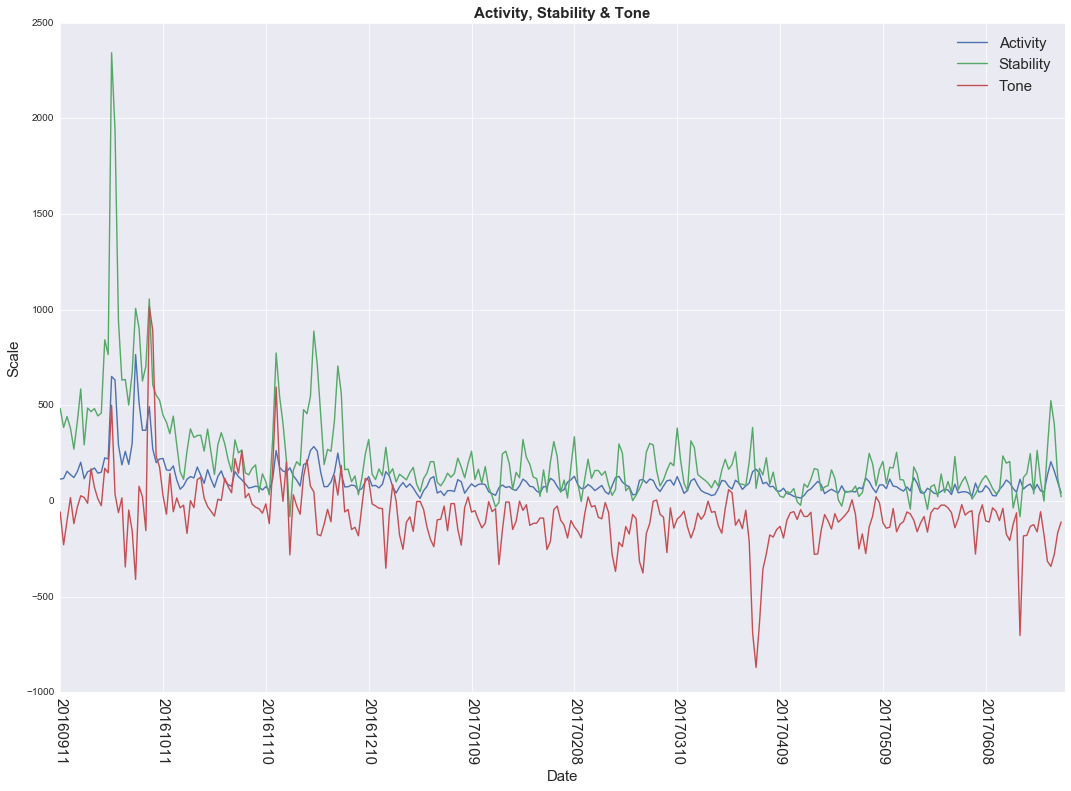

In [39]:
labels = sorted([key for key in Counter(all_events['SQLDATE']).keys()])
activity = [len(all_events.loc[all_events['SQLDATE'] == key]) for key in labels]
stability = [all_events.loc[all_events['SQLDATE'] == key, 'GoldsteinScale'].sum() for key in labels]
tone = [all_events.loc[all_events['SQLDATE'] == key, 'AvgTone'].sum() for key in labels]

ind = np.arange(len(labels)) 

fig10, ax = plt.subplots(figsize=(18, 12))
ax.set_title('Activity, Stability & Tone', fontsize=15, fontweight='bold')
plt.style.use('seaborn-paper')
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Scale' , fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)

ax.set_xticks(np.arange(0, len(labels), 30))
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=270)
plt.xlim([0,len(labels)])
ax.set_xticklabels(labels[::30])
plt.plot(ind, activity, label='Activity')
plt.plot(ind, stability, label='Stability')
plt.plot(ind, tone, label='Tone')
plt.legend(loc='best', fontsize=15)

### Correlation: Activity, Tone, Stability

           Activity  Stability      Tone
Activity   1.000000   0.890327  0.244213
Stability  0.890327   1.000000  0.397163
Tone       0.244213   0.397163  1.000000


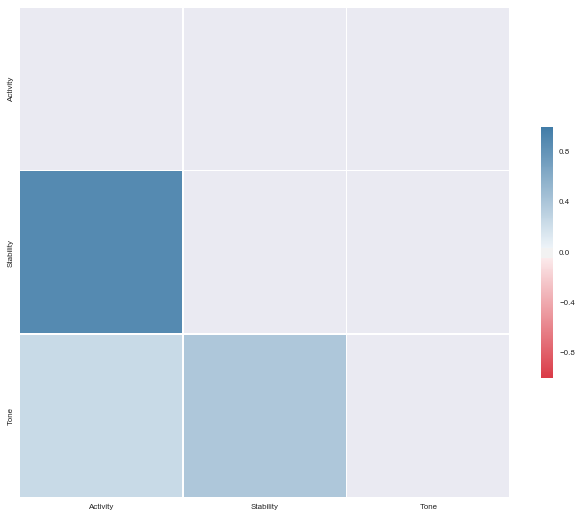

In [40]:
# Create Correlation DataFrame
df_events = pd.DataFrame()
df_events['Activity'] = activity
df_events['Stability'] = stability
df_events['Tone'] = tone

# Compute the correlation matrix
corr = df_events.corr(method='pearson')

# Print correlation results
print(corr)

# Write correlation coefficients to file        
#with open('correlation_results.txt','w') as outfile:
#    corr.to_string(outfile)
#outfile.close()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig11, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 240, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [41]:
print('Tone - Stability: ', sp.stats.spearmanr(df_events['Tone'],df_events['Stability']))
print('Tone - Activity: ', sp.stats.spearmanr(df_events['Tone'],df_events['Activity']))
print('Activity - Stability: ', sp.stats.spearmanr(df_events['Activity'],df_events['Stability']))

Tone - Stability:  SpearmanrResult(correlation=0.31719865508766593, pvalue=2.8510841723327175e-08)
Tone - Activity:  SpearmanrResult(correlation=0.077974528378978072, pvalue=0.18317883586038761)
Activity - Stability:  SpearmanrResult(correlation=0.80500509357143879, pvalue=6.0119815207444548e-68)


In [42]:
#network_df = all_events.filter(items=['Actor1Type1Code', 'Actor2Type1Code', 'GoldsteinScale'])
#network_df.to_csv('out.csv', sep=',', index=False)